# Problem 1.1 Supervised Learning
This is when you have the target variable to train your model. It can be of two types
- Regression (continous variable prediction)
- Classification (discrete variable prediction)

We will look at both of them in this notebook. The datasets used in this notebook are from UCI ML Repository

In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 

# 1. Regression

In [4]:
# Load the dataset
df = pd.read_csv('airbnb.csv')

# Display the first few rows
print(df.head())

   Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full            coordinates  \
0   20583125    Michel         Brooklyn, Flatlands  (40.63222, -73.93398)   
1   82746113   Cecilia  Manhattan, Upper West Side  (40.78761, -73.96862)   
2      78251    Leslie  Brooklyn, Brooklyn Heights   (40.7007, -73.99517)   
3   32715865    Yelena  Manhattan, Upper West Side  (40.79169, -73.97498)   
4  154262349    Brooke  Manhattan, Lower East Side  (40.71884, -73.98354)   

         room_type price  number_of_reviews last_review 

In [5]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [6]:
# Get summary statistics
print(df.describe())

         Unnamed: 0    listing_id       host_id  number_of_reviews  \
count  10019.000000  1.001900e+04  1.001900e+04       10019.000000   
mean    5009.000000  1.927634e+07  6.795923e+07          22.459727   
std     2892.380507  1.095056e+07  7.863106e+07          43.173896   
min        0.000000  3.831000e+03  2.787000e+03           0.000000   
25%     2504.500000  9.674772e+06  7.910880e+06           1.000000   
50%     5009.000000  2.007030e+07  3.165167e+07           5.000000   
75%     7513.500000  2.933864e+07  1.074344e+08          22.000000   
max    10018.000000  3.648724e+07  2.741034e+08         510.000000   

       reviews_per_month  availability_365       rating  number_of_stays  \
count        7944.000000      10019.000000  7944.000000      7944.000000   
mean            1.353894        112.284260     4.014458        33.991541   
std             1.615380        131.636043     0.575064        56.089279   
min             0.010000          0.000000     3.000633         1

In [7]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64


In [8]:
# Drop rows where 'price' is missing
df = df.dropna(subset=['price'])
# Fill missing 'name' and 'host_name' with 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
# Fill missing review-related columns with zeros
review_cols = ['reviews_per_month', 'rating', 'number_of_stays', '5_stars']
df[review_cols] = df[review_cols].fillna(0)
# GPT helped with this part
# Drop 'last_review' if not needed
df = df.drop('last_review', axis=1)

/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/1523616482.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
/var/folders/m2/bs2ndp296zj1k_mhdr63dk340000gn/T/ipykernel_78150/1523616482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [9]:
# Clean and convert 'price' to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Function to extract latitude and longitude
def extract_latitude(coord):
    return float(coord.strip('()').split(',')[0])

def extract_longitude(coord):
    return float(coord.strip('()').split(',')[1])

# Create 'latitude' and 'longitude' columns
df['latitude'] = df['coordinates'].apply(extract_latitude)
df['longitude'] = df['coordinates'].apply(extract_longitude)

# Drop the 'coordinates' column
df = df.drop('coordinates', axis=1)

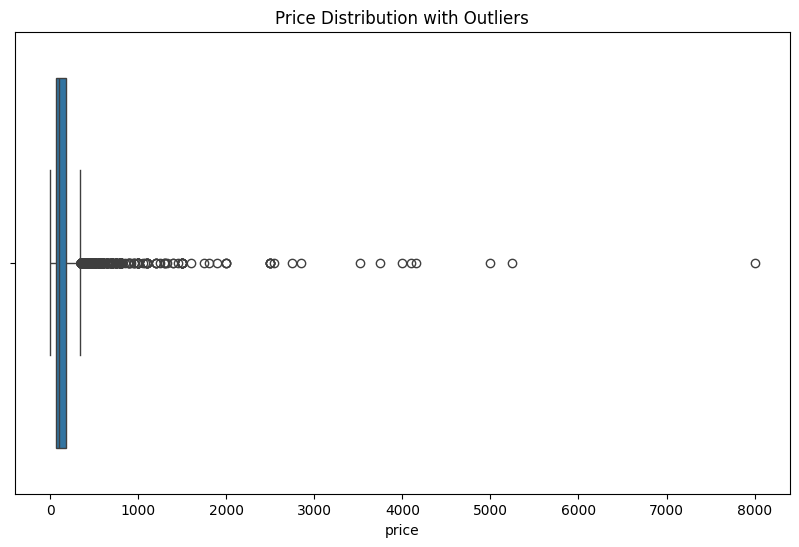

In [10]:
# Visualize price distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Outliers')
plt.show()

In [11]:
# Remove price outliers beyond the 95th percentile
q95 = df['price'].quantile(0.95)
df = df[df['price'] <= q95]

In [12]:
# Check for remaining missing values
print(df.isnull().sum())

Unnamed: 0            0
listing_id            0
name                  0
host_id               0
host_name             0
neighbourhood_full    0
room_type             0
price                 0
number_of_reviews     0
reviews_per_month     0
availability_365      0
rating                0
number_of_stays       0
5_stars               0
listing_added         0
latitude              0
longitude             0
dtype: int64


In [13]:
# Check data types
print(df.dtypes)

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                 float64
number_of_reviews       int64
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object


In [14]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [15]:
# Display the shape of the cleaned dataset
print(f"Cleaned DataFrame Shape: {df.shape}")
# Display the first few rows of the cleaned data
print(df.head())

Cleaned DataFrame Shape: (9308, 17)
   Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full        room_type  price  \
0   20583125    Michel         Brooklyn, Flatlands     Private room   45.0   
1   82746113   Cecilia  Manhattan, Upper West Side  Entire home/apt  135.0   
2      78251    Leslie  Brooklyn, Brooklyn Heights  Entire home/apt  150.0   
3   32715865    Yelena  Manhattan, Upper West Side  Entire home/apt   86.0   
4  154262349    Brooke  Manhattan, Lower East Side     Private room  160.0   

   number_of_r

Data looks clean, lets check if variables are correlated

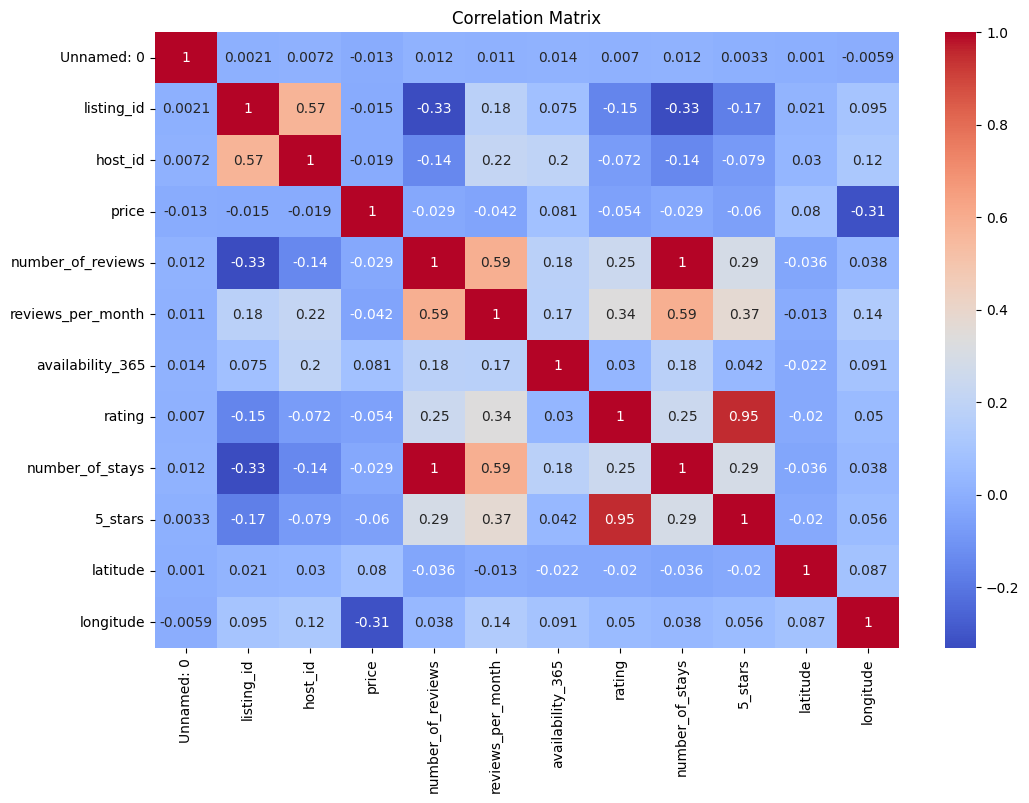

In [16]:
# Select numeric features for correlation matrix
numeric_features = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<!-- Ideally I would Consider Removing Weakly Correlated Features like
- X1 transaction date: Correlation with the target is very low (0.087).
- X2 house age: Correlation is also weak (-0.21) and may not contribute significantly.

Address Multicollinearity:

Between X3 distance to the nearest MRT station and X6 longitude, choose one. Since X3 has a stronger correlation with the target, you might consider keeping X3 and removing X6.

Since I dont have a lot of features here, I'm procedding without any changes. -->

In [17]:
# Select features and target
features = ['number_of_stays', 'rating', 'room_type', 'neighbourhood_full', 'availability_365', '5_stars']
X = df[features]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['room_type', 'neighbourhood_full'], drop_first=True)


In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 2773.52
R2 Score: 0.48


Ideally r2 score has to be closer to 1 but the model isn't bad. To get more clarity lets plot actual vs predicted prices

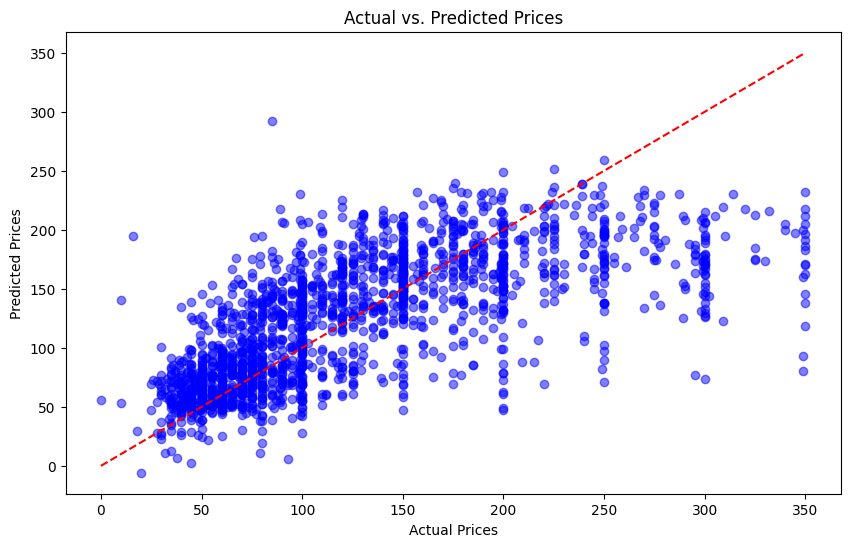

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

The scatter plot shows a positive correlation between actual and predicted prices, indicating that the model performs well overall.
Deviations from the diagonal line suggest some prediction errors, particularly for extreme values.

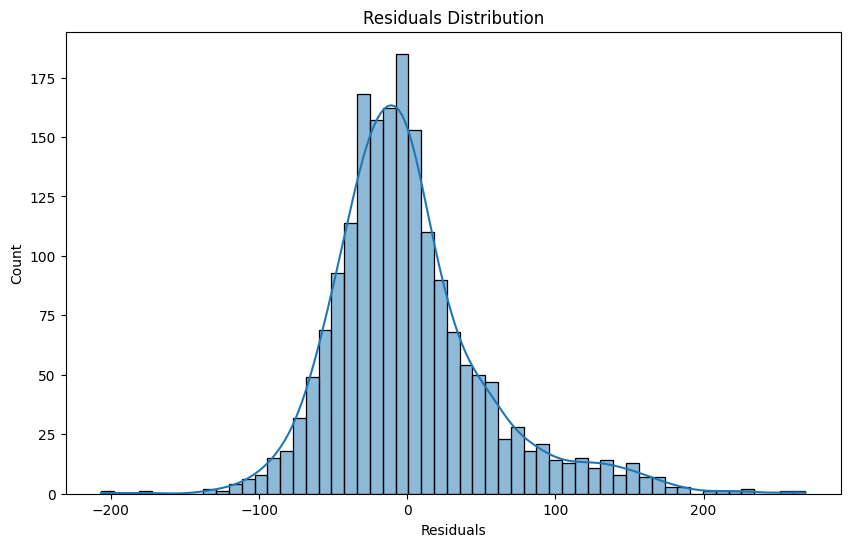

In [21]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

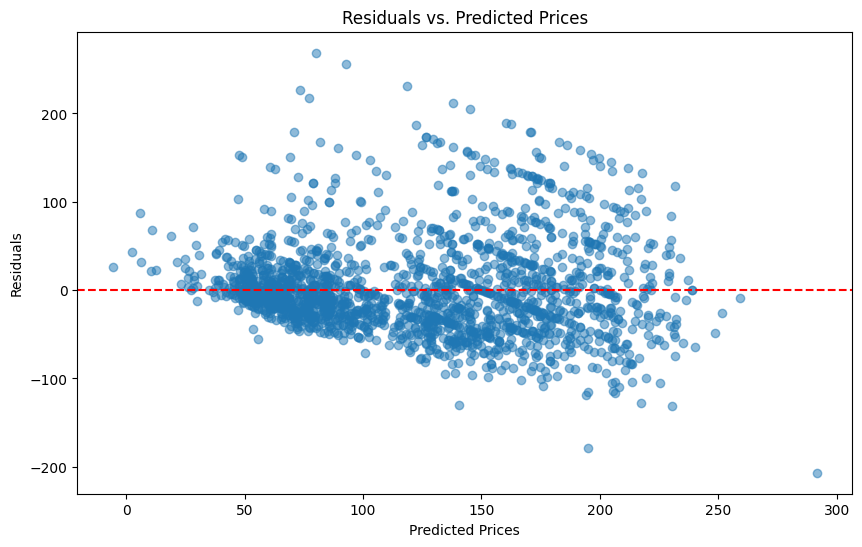

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Random Forest

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf:.2f}')
print(f'Random Forest R2 Score: {r2_rf:.2f}')

Random Forest MSE: 3031.99
Random Forest R2 Score: 0.43


Performs a little better than Linear Regression, lets plot to verify

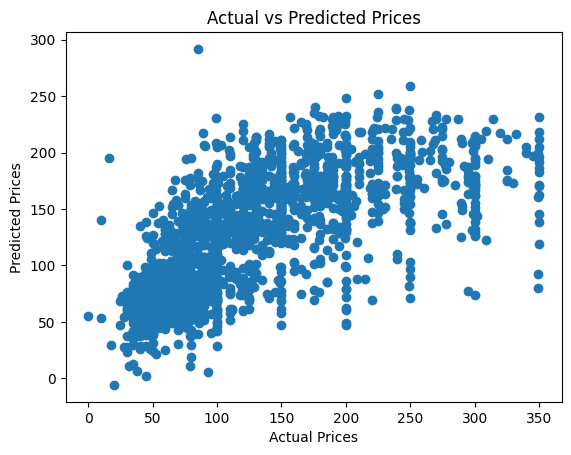

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

## Problem 1.2. Supervised Learning: Analysis

I tried using both linear regression and random forest models to predict Airbnb listing prices, and here's what I found. The linear regression model gave me a Mean Squared Error (MSE) of 2773.52 and an R-squared (R²) score of 0.48, so it explains about 48% of the price variability. Surprisingly, the random forest model performed slightly worse, with an MSE of 3031.99 and an R² of 0.43.

I think the linear regression model was effective because it highlighted key features like room type, location, and host ratings that influence price, and it's pretty straightforward to interpret. However, neither model was particularly great at predicting prices since they both left over half of the variance unexplained. This might be because important factors like amenities, seasonal demand, or dynamic pricing strategies weren't included in the data.

It's interesting because I expected the random forest to perform better due to its ability to capture complex patterns, but that wasn't the case. Maybe it needed more tuning or more relevant features to work with.

Overall, this exercise shows me that sometimes simpler models like linear regression can be just as effective as more complex ones, depending on the data. It also highlights the importance of good feature selection and understanding the problem domain, which complements the other tools we've studied in class.

# Problem 1.3. Unsupervised learning

I decided to apply K-means clustering to the Airbnb dataset to uncover hidden patterns. Here's how I approached it, inspired by the example guide

I selected the following features for clustering:

- Price: Central to distinguishing listings.
- Latitude and Longitude: Capture geographical information.
- Number of Reviews: Indicates popularity.
- Availability_365: Shows how often a listing is available.

I think these features will help identify clusters based on location, pricing, and demand.

In [1]:
# Select features and drop missing values
features = ['price', 'latitude', 'longitude', 'number_of_reviews', 'availability_365']
X = df[features].dropna()

# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values after conversion
X = X.dropna()


NameError: name 'df' is not defined

In [20]:
phishing_websites = fetch_ucirepo(id=327)
X = phishing_websites.data.features 
y = phishing_websites.data.targets 

data = pd.concat([X, y], axis=1)
data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [21]:
# feature information 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

In [22]:
#target information
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   result  11055 non-null  int64
dtypes: int64(1)
memory usage: 86.5 KB


In [23]:
print(X.isnull().sum())

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64


In [24]:
print(y.isnull().sum())

result    0
dtype: int64


In [25]:
y.value_counts()

result
 1        6157
-1        4898
Name: count, dtype: int64

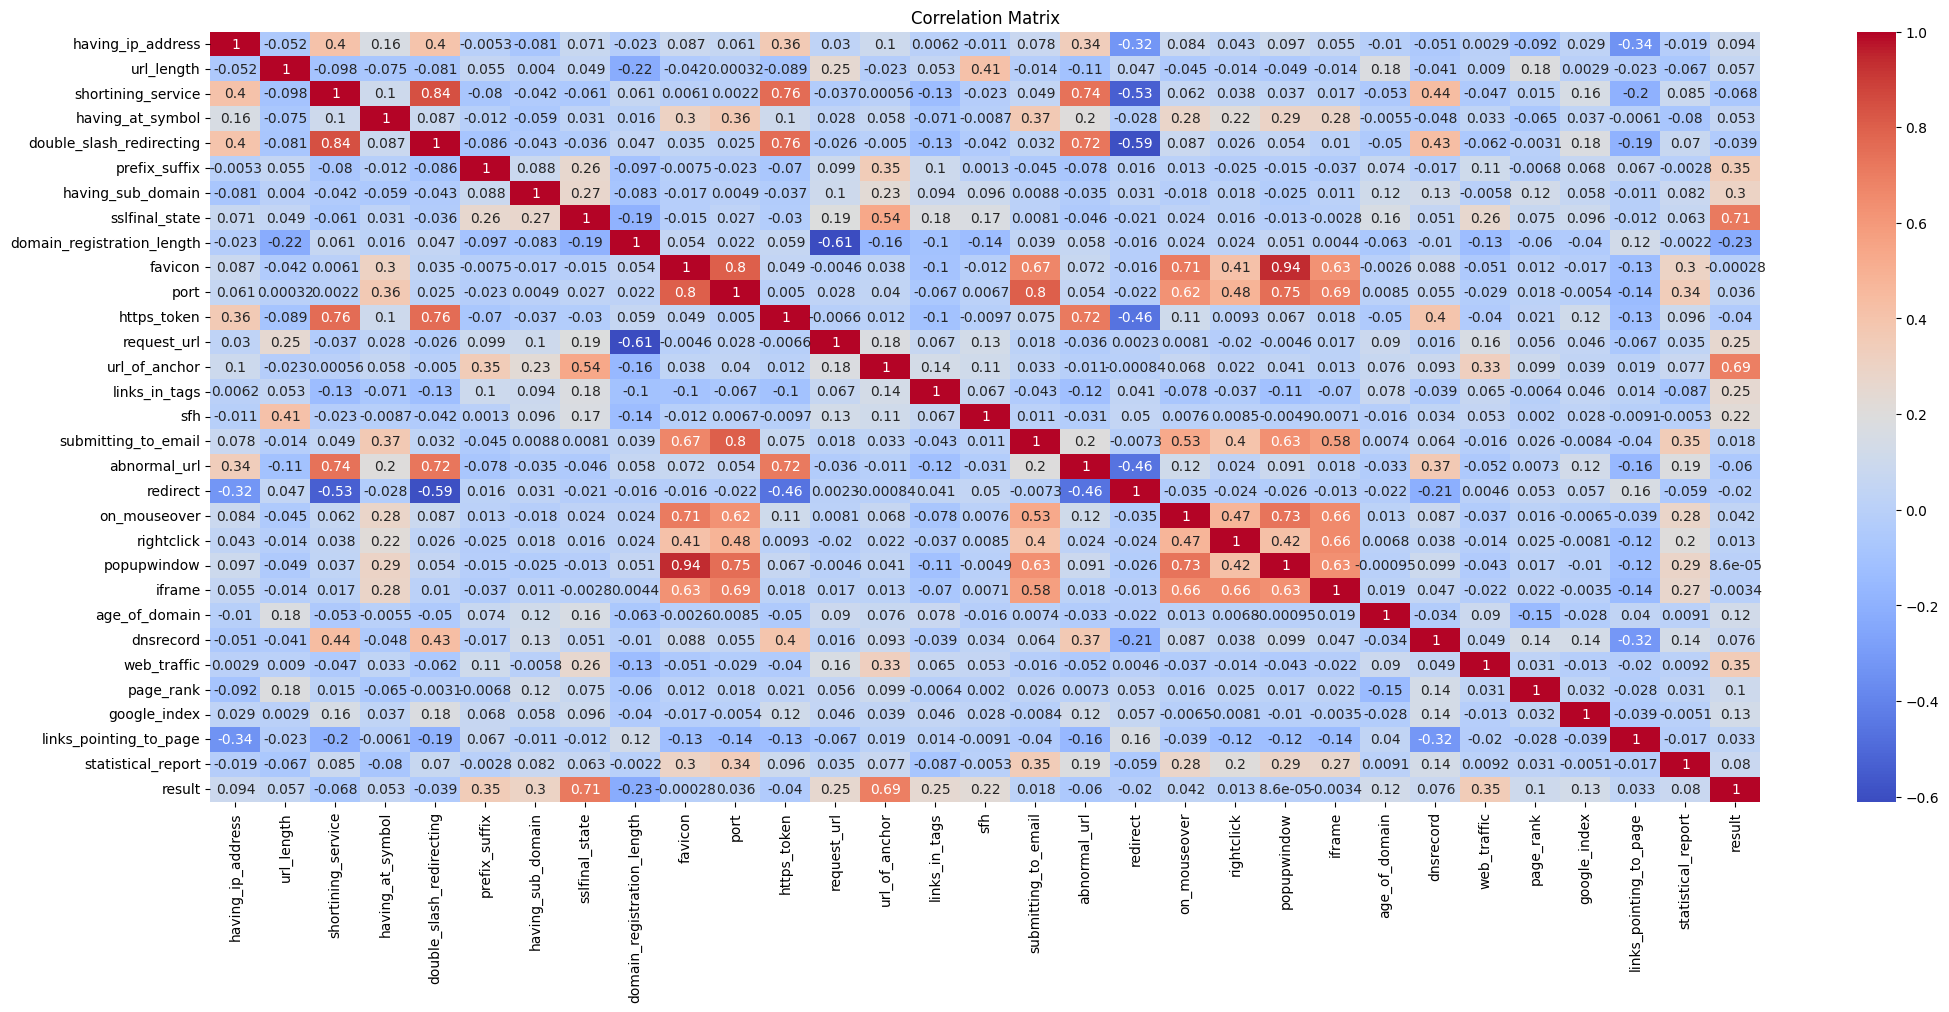

In [26]:
# concatanating the features and target variable into a single dataframe
phishing_data = pd.concat([X, y], axis=1)

corr_matrix = phishing_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# threshold for considering features as highly correlated
threshold = 0.8

# Find pairs of features with correlation above the threshold
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs >= threshold)]

print('Highly correlated feature pairs:')
print(high_corr)

Highly correlated feature pairs:
favicon                   popupwindow                 0.939633
popupwindow               favicon                     0.939633
shortining_service        double_slash_redirecting    0.842796
double_slash_redirecting  shortining_service          0.842796
favicon                   port                        0.803834
port                      favicon                     0.803834
dtype: float64


Since favicon is highly correlated with both popupwindow and port, removing favicon would address multicollinearity with two features simultaneously. But I'll not remove anything here and will go for initial training. Post training if I feel popupwindown is highly impoantant it will give me a clarity on removing favicon. The same analysis goes with shorrtning_service and double_slash_redirecting

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

In [34]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.99      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



The accuracy looks really good

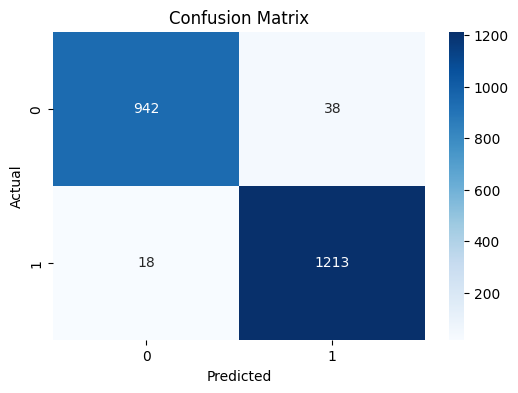

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()